In [1]:
#Importing the libraries
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
#for ucb
import math
N=10000   #Users
d=10      #No of Adds
ads_selected=[]
number_of_selection=[0]*d
sum_of_rewards=[0]*d
total_rewards=0

for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(number_of_selection[i]>0):
            average_reward=sum_of_rewards[i]/number_of_selection[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selection[i])
            upper_bound=average_reward+delta_i
        
        else:
            upper_bound=1e400
            
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
        
    ads_selected.append(ad)
    number_of_selection[ad]+=1 
    reward=dataset.values[n,ad]
    sum_of_rewards[ad]+=reward
    total_rewards+=reward   
    

Text(0, 0.5, 'Number of times each ad was selected')

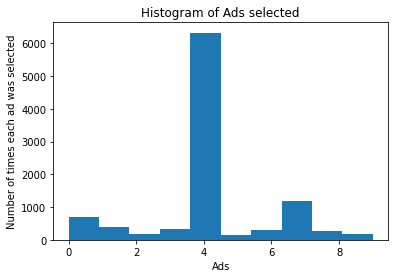

In [8]:
#visualling the results
plt.hist(ads_selected)
plt.title("Histogram of Ads selected")
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')